# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [6]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dejay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
# api_key = os.getenv("NEWS_API_KEY")
api_key = "17115e77b4de40ae8ec1055ec86e36a2"

In [15]:
print(api_key)

17115e77b4de40ae8ec1055ec86e36a2


In [16]:
from newsapi import NewsApiClient 

In [18]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [19]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
BTC_news = newsapi.get_everything(
    q="BTC News", language="en", sort_by="relevancy"
)

print(f"Total articles about BTC News: {BTC_news['totalResults']}")

BTC_news["articles"][0]

Total articles about BTC News: 847


{'source': {'id': None, 'name': 'Techmeme.com'},
 'author': None,
 'title': 'An interview with Senator Cynthia Lummis on advocating for the crypto industry, educating members of Congress, buying $100K+ in bitcoin and holding, and more (Nikhilesh De/CoinDesk)',
 'description': "Nikhilesh De / CoinDesk:\nAn interview with Senator Cynthia Lummis on advocating for the crypto industry, educating members of Congress, buying $100K+ in bitcoin and holding, and more\xa0 —\xa0 The Wyoming senator, a speaker at CoinDesk's Consensus festival, holds p…",
 'url': 'https://www.techmeme.com/220415/p12',
 'urlToImage': 'https://www.coindesk.com/resizer/F7pk3wk1_-tlxE4EYrqWysaFMHE=/1200x628/center/middle/cloudfront-us-east-1.images.arcpublishing.com/coindesk/NKLIJV3DE5HQVAHQY3UHXARLUA.png',
 'publishedAt': '2022-04-15T17:55:01Z',
 'content': 'Cybersecurity Dive\r\nIn-depth journalism and daily insights into the most impactful news and trends shaping cybersecurity, covering the topics executives need to 

In [20]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ETH_news = newsapi.get_everything(
    q="ETH News", language="en", sort_by="relevancy"
)

print(f"Total articles about ETH News: {ETH_news['totalResults']}")

ETH_news["articles"][0]

Total articles about ETH News: 739


{'source': {'id': None, 'name': 'VentureBeat'},
 'author': 'Sadie Williamson',
 'title': 'Ukraine initiates NFT-powered Metahistory Museum Of War',
 'description': 'The Ukrainian Ministry of Digital Transformation is launching the first digital Metahistory Museum to chronicle the geopolitical conflict.',
 'url': 'https://venturebeat.com/2022/03/29/ukraine-initiates-nft-powered-metahistory-museum-of-war/',
 'urlToImage': 'https://venturebeat.com/wp-content/uploads/2022/03/GettyImages-1307112137.jpg?w=1200&strip=all',
 'publishedAt': '2022-03-29T17:07:00Z',
 'content': 'The unfolding geopolitical conflict in Ukraine has proved to be a potent testing ground for a new range of strategic weapons, namely focused on waging the battle for more widespread public support. B… [+4239 chars]'}

In [23]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

sent = []

for news in BTC_news ["articles"]:
    content = news["content"]
    result = analyzer.polarity_scores(content)
    neg = result["neg"]
    neu = result["neu"]
    pos = result["pos"]
    compound = result["compound"]
    sent.append({
    'text':content,
    'neg':neg,
    'neu':neu,
    'pos':pos,
    'compound':compound
    }
    )

sent_df = pd.DataFrame(sent)

In [24]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
sent = []

for news in ETH_news ["articles"]:
    content = news["content"]
    result = analyzer.polarity_scores(content)
    neg = result["neg"]
    neu = result["neu"]
    pos = result["pos"]
    compound = result["compound"]
    sent.append({
    'text':content,
    'neg':neg,
    'neu':neu,
    'pos':pos,
    'compound':compound
    }
    )

sent_eth_df = pd.DataFrame(sent)

In [25]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
sent_df.describe()

,neg,neu,pos,compound
count,20.000000,20.000000,20.00000,20.000000
mean,0.016950,0.915350,0.06770,0.189590
std,0.032007,0.074351,0.07087,0.319343
min,0.000000,0.721000,0.00000,-0.296000
25%,0.000000,0.888250,0.00000,0.000000
50%,0.000000,0.947500,0.05000,0.177900
75%,0.011250,0.950000,0.08400,0.355475
max,0.107000,1.000000,0.23400,0.743000


In [26]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
sent_eth_df.describe()

,neg,neu,pos,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.042150,0.904500,0.053400,0.032080
std,0.051832,0.091391,0.076104,0.390915
min,0.000000,0.677000,0.000000,-0.592700
25%,0.000000,0.867750,0.000000,-0.238025
50%,0.026500,0.934000,0.000000,0.000000
75%,0.066500,0.964000,0.085000,0.208300
max,0.189000,1.000000,0.263000,0.865500


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: BTC

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [27]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [28]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stopwords = stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stopwords.append('license')

### Order of operations
1. Create the list of words from article/text, not stop words
2. convert the list of words to lowercase
3. remove punctuation
4. remove stopwords from list of words from article/text
5. lemmatize words

In [31]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in stopwords]
    
    # Remove the stop words
    tokens = list(filter(lambda word:word.lower not in stopwords,output))
    
    return tokens

In [32]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
sent_df["BTC_Tokens"] = sent_df.text.apply(tokenizer)
sent_df.head()

,text,neg,neu,pos,compound,BTC_Tokens
0,Cybersecurity Dive\r\nIn-depth journalism and ...,0.066,0.934,0.000,-0.2263,"[cybersecurity, diveindepth, journalism, daily..."
1,Cybersecurity Dive\r\nIn-depth journalism and ...,0.066,0.934,0.000,-0.2263,"[cybersecurity, diveindepth, journalism, daily..."
2,What happened \r\nCryptocurrencies started the...,0.000,0.812,0.188,0.7351,"[happenedcryptocurrencies, started, week, good..."
3,Table: BTC mining operations\r\nTable: BTC min...,0.000,1.000,0.000,0.0000,"[table, btc, mining, operationstable, btc, min..."
4,What happened\r\nMany cryptocurrencies and cry...,0.000,0.795,0.205,0.7351,"[happenedmany, cryptocurrencies, cryptorelated..."


In [33]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
sent_eth_df["ETH_Tokens"] = sent_eth_df.text.apply(tokenizer)
sent_eth_df.head()

,text,neg,neu,pos,compound,ETH_Tokens
0,The unfolding geopolitical conflict in Ukraine...,0.189,0.677,0.135,-0.3041,"[unfolding, geopolitical, conflict, ukraine, h..."
1,Cybersecurity Dive\r\nIn-depth journalism and ...,0.066,0.934,0.000,-0.2263,"[cybersecurity, diveindepth, journalism, daily..."
2,Moonbirds NFTs have officially made its debut....,0.000,1.000,0.000,0.0000,"[moonbirds, nfts, officially, made, debut, pro..."
3,Cybersecurity Dive\r\nIn-depth journalism and ...,0.066,0.934,0.000,-0.2263,"[cybersecurity, diveindepth, journalism, daily..."
4,A rare AzukiNFT recently sold for over 420.7 E...,0.000,1.000,0.000,0.0000,"[rare, azukinft, recently, sold, eth, equivale..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [34]:
from collections import Counter
from nltk import ngrams

In [41]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bigram_counts = Counter(ngrams(tokenizer(sent_df.text.str.cat()), n=2))
print(dict(bigram_counts))

{('cybersecurity', 'diveindepth'): 1, ('diveindepth', 'journalism'): 2, ('journalism', 'daily'): 2, ('daily', 'insight'): 2, ('insight', 'impactful'): 2, ('impactful', 'news'): 2, ('news', 'trend'): 2, ('trend', 'shaping'): 2, ('shaping', 'cybersecurity'): 2, ('cybersecurity', 'covering'): 2, ('covering', 'topic'): 2, ('topic', 'executive'): 2, ('executive', 'need'): 2, ('need', 'know'): 2, ('know', 'breach'): 2, ('breach', 'vulnerability'): 2, ('vulnerability', 'regulat'): 2, ('regulat', 'charscybersecurity'): 1, ('charscybersecurity', 'diveindepth'): 1, ('regulat', 'charswhat'): 1, ('charswhat', 'happenedcryptocurrencies'): 1, ('happenedcryptocurrencies', 'started'): 1, ('started', 'week'): 1, ('week', 'good'): 1, ('good', 'note'): 1, ('note', 'value'): 1, ('value', 'jumping'): 1, ('jumping', 'across'): 1, ('across', 'board'): 1, ('board', 'mondays'): 1, ('mondays', 'trading'): 1, ('trading', 'upward'): 1, ('upward', 'trend'): 1, ('trend', 'started'): 1, ('started', 'late'): 1, ('lat

In [45]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_counts_eth = Counter(ngrams(tokenizer(sent_eth_df.text.str.cat()), n=2))
print(dict(bigram_counts_eth))

{('unfolding', 'geopolitical'): 1, ('geopolitical', 'conflict'): 1, ('conflict', 'ukraine'): 1, ('ukraine', 'ha'): 1, ('ha', 'proved'): 1, ('proved', 'potent'): 1, ('potent', 'testing'): 1, ('testing', 'ground'): 1, ('ground', 'new'): 1, ('new', 'range'): 1, ('range', 'strategic'): 1, ('strategic', 'weapon'): 1, ('weapon', 'namely'): 1, ('namely', 'focused'): 1, ('focused', 'waging'): 1, ('waging', 'battle'): 1, ('battle', 'widespread'): 1, ('widespread', 'public'): 1, ('public', 'support'): 1, ('support', 'b'): 1, ('b', 'charscybersecurity'): 1, ('charscybersecurity', 'diveindepth'): 2, ('diveindepth', 'journalism'): 2, ('journalism', 'daily'): 2, ('daily', 'insight'): 2, ('insight', 'impactful'): 2, ('impactful', 'news'): 2, ('news', 'trend'): 2, ('trend', 'shaping'): 2, ('shaping', 'cybersecurity'): 2, ('cybersecurity', 'covering'): 2, ('covering', 'topic'): 2, ('topic', 'executive'): 2, ('executive', 'need'): 2, ('need', 'know'): 2, ('know', 'breach'): 2, ('breach', 'vulnerability'

In [46]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [47]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
print(dict(bigram_counts.most_common(10)))

{('digital', 'asset'): 8, ('charsthe', 'leader'): 7, ('leader', 'news'): 7, ('news', 'information'): 7, ('information', 'cryptocurrency'): 7, ('cryptocurrency', 'digital'): 7, ('asset', 'future'): 7, ('future', 'money'): 7, ('money', 'coindesk'): 7, ('coindesk', 'medium'): 7}


In [48]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
print(dict(bigram_counts_eth.most_common(10)))

{('charscybersecurity', 'diveindepth'): 2, ('diveindepth', 'journalism'): 2, ('journalism', 'daily'): 2, ('daily', 'insight'): 2, ('insight', 'impactful'): 2, ('impactful', 'news'): 2, ('news', 'trend'): 2, ('trend', 'shaping'): 2, ('shaping', 'cybersecurity'): 2, ('cybersecurity', 'covering'): 2}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [54]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

def cloud(text, title = ""):
    wc = WordCloud(width=1200, height=800, max_words=50).generate(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(title)
    plt.show()


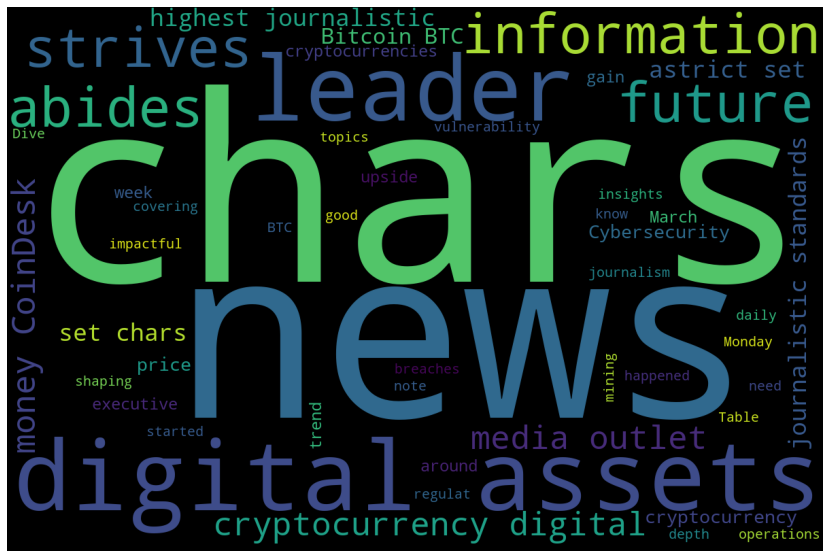

In [55]:
cloud(sent_df.text.str.cat())

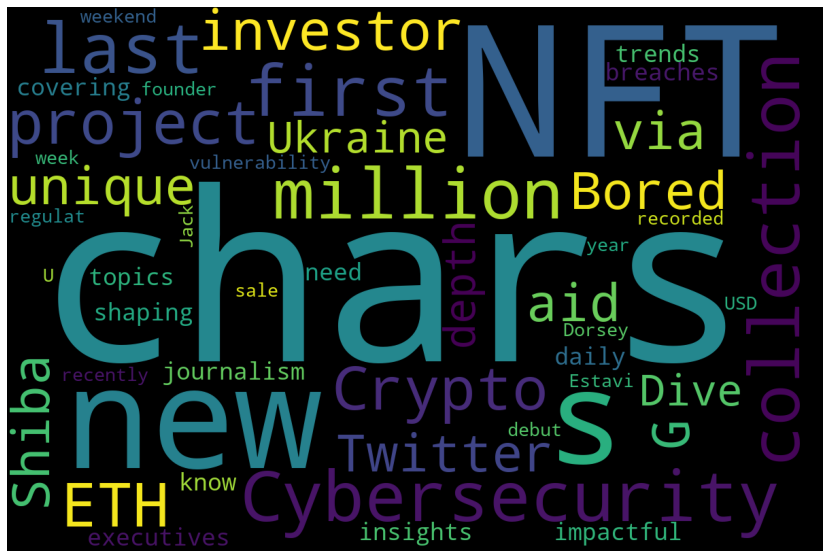

In [57]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
cloud(sent_eth_df.text.str.cat())

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [61]:
import spacy
from spacy import displacy

In [63]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm
# nlp = spacy.load("en_core_web_sm")

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [64]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [66]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text = (sent_df.text.str.cat())

In [67]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(all_btc_text)

# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data["title"] = "BTC NER"

In [68]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style='ent')

In [71]:
# List all Entities
# YOUR CODE HERE!

for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Cybersecurity Dive ORG
daily DATE
Dive ORG
daily DATE
the week DATE
Monday DATE
Sunday DATE
Companys GPE
March 4, 2022 DATE
Tuesday DATE
3.97% PERCENT
Ethereum ORG
3.98% PERCENT
24-hour TIME
3.9% PERCENT
3.2% PERCENT
CoinDesk ORG
CoinDesk ORG
CoinDesk ORG
CoinDesk ORG
the White House ORG
Joe Biden PERSON
March 9 DATE
around $40,000 MONEY
Monday DATE
the past week DATE
the second half DATE
CoinDesk ORG
CoinDesk ORG
CoinDesk ORG
morning TIME
a third straight day DATE
around $41,500 MONEY
ApeCoin ORG
15% PERCENT
the past two weeks DATE
37,000 MONEY
early March DATE
UST ORG
fourth ORDINAL
46,000 MONEY
50,000 MONEY
DiPasquale ORG
around $4 MONEY
43,500 MONEY
46,700 MONEY
above $40,000 MONEY
three-month DATE
43,500 MONEY


---

### Ethereum NER

In [72]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text = (sent_eth_df.text.str.cat())

In [73]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(all_eth_text)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "ETH NER"

In [74]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent')

In [75]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Ukraine GPE
Dive ORG
daily DATE
first ORDINAL
Kevin ORG
PROOF Collective PERSON
the weekend DATE
Dive ORG
daily DATE
420.7 CARDINAL
ETH ORG
approximately $1.4 million MONEY
USD ORG
OpenSea ORG
NFT ORG
Azuk GPE
Sina Estavi PERSON
Twitter PRODUCT
Jack Dorsey PERSON
first ORDINAL
NFT ORG
$2.9 million MONEY
last year DATE
Just last week DATE
Estavi PERSON
NFT ORG
$48 million MONEY
Transform ORG
July 19 DATE
July 20 - 28 DATE
today DATE
Bored & ORG
Hungry ORG
Long Beach GPE
California GPE
Twitter PRODUCT
NFT ORG
mascot PERSON
G-NO ORG
Music Group ORG
Kingship ORG
first ORDINAL
NFT ORG
four CARDINAL
the Bored Ape Yacht Club NFT ORG
Accordi PERSON
Eaton GPE
Ukraine GPE
NFT ORG
5,000 CARDINAL
Los Angeles GPE
1.81% PERCENT
morning TIME
tomorrow DATE
Easter PERSON
Monday DATE
OnePlus Ace ORG
OnePlus ORG
Dorsey PERSON
Twitter PERSON
Burhaan Kinu/Hindustan Times PERSON
Getty Images GPE
Hindustan Times ORG
Getty Images ORG
THE FINTECH SNARK TANK ORG
CoinDesk ORG
1.60% PERCENT
Shiba Inu ORG
Last wee

---